In [ ]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft
%matplotlib inline  


In [ ]:
ecg = pd.read_csv("/content/drive/Shareddrives/Medidas 1/Proyectos/Proyecto 2/Análisis Señal/señal2.csv", header = 1, usecols=[3,4], skiprows = 0)
ecg.reset_index(drop = True, inplace = True)
ecg

,Second,Volt
0,-0.081920,0.6
1,-0.081912,0.6
2,-0.081904,0.8
3,-0.081896,0.6
4,-0.081888,0.8
...,...,...
20475,0.081880,2.8
20476,0.081888,2.2
20477,0.081896,2.2
20478,0.081904,3.0


In [ ]:
freq_muestreo = 1/(ecg['Second'][22]-ecg['Second'][21])
print(f"La frecuencia de muestreo es {freq_muestreo/1000} KHz")

La frecuencia de muestreo es 124.97000719826728 KHz


Text(0.5, 0, 'Tiempo (s)')

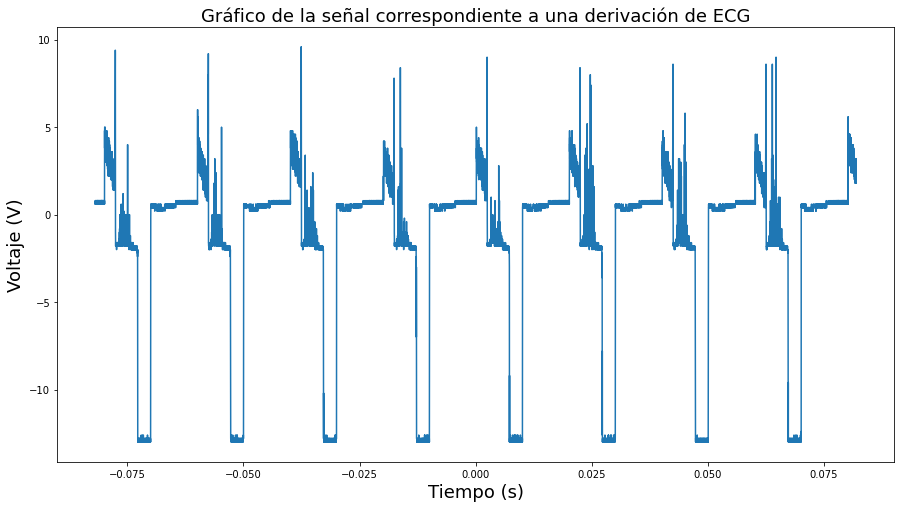

In [ ]:
# Señal en el dominio del tiempo
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecg['Second'],ecg['Volt'])
plt.title("Gráfico de la señal correspondiente a una derivación de ECG", fontsize = 18)
plt.ylabel("Voltaje (V)",  fontsize = 18)
plt.xlabel("Tiempo (s)",  fontsize = 18)

<Figure size 1440x576 with 0 Axes>

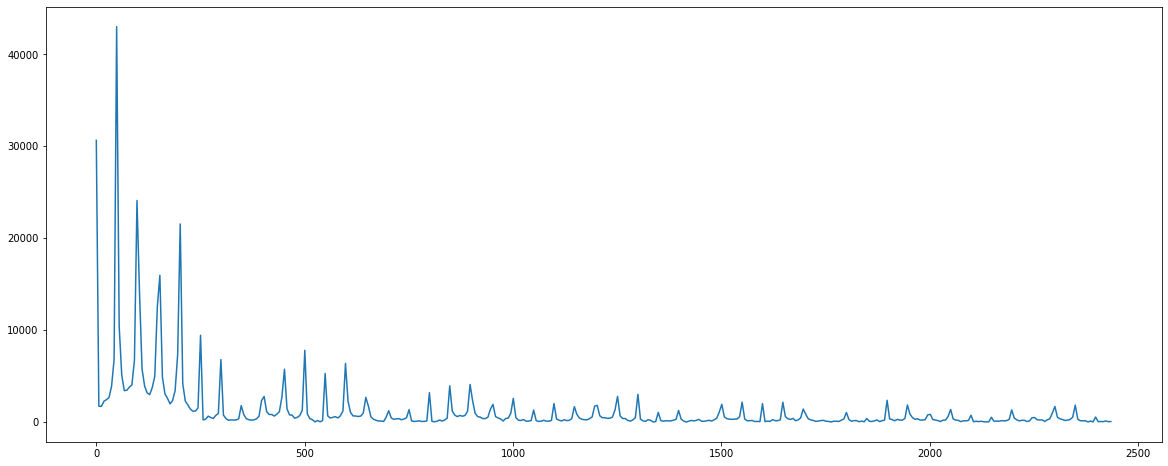

In [ ]:
# Dominio de la frecuencia
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
ecgData = ecg['Volt'].values
fftData = np.abs( fft(ecgData) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,freq_muestreo/2, fftLen )

matplotlib.rc('figure', figsize=(20, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

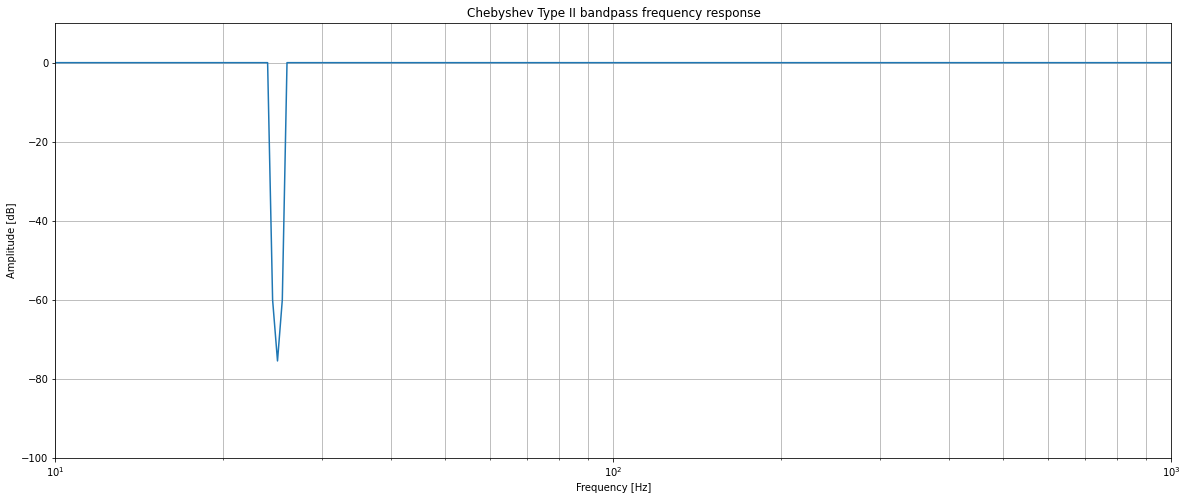

In [ ]:
## Design IIR filter
from scipy import signal
sos = signal.iirfilter(17, [49, 51], rs=60, btype='bandstop',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [ ]:
## Filtro el ruido de 50 hz
ecg_filtrado = signal.sosfilt(sos, ecgData)

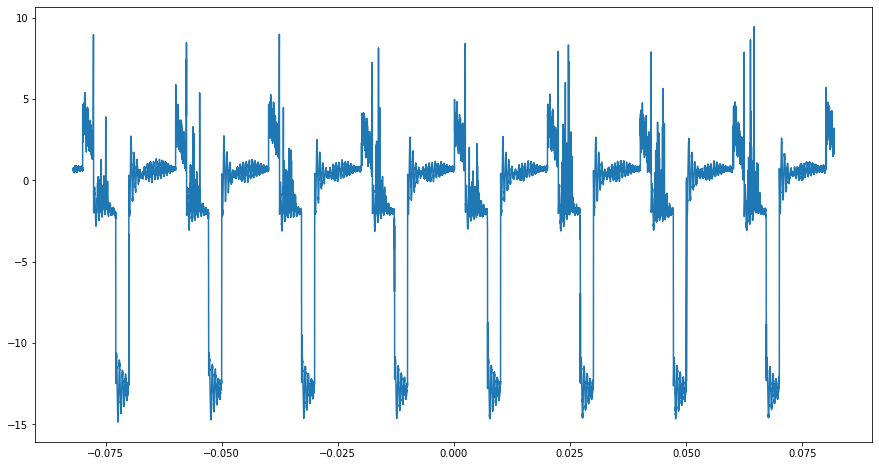

In [ ]:

# Señal en el dominio temporal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecg['Second'],ecg_filtrado)

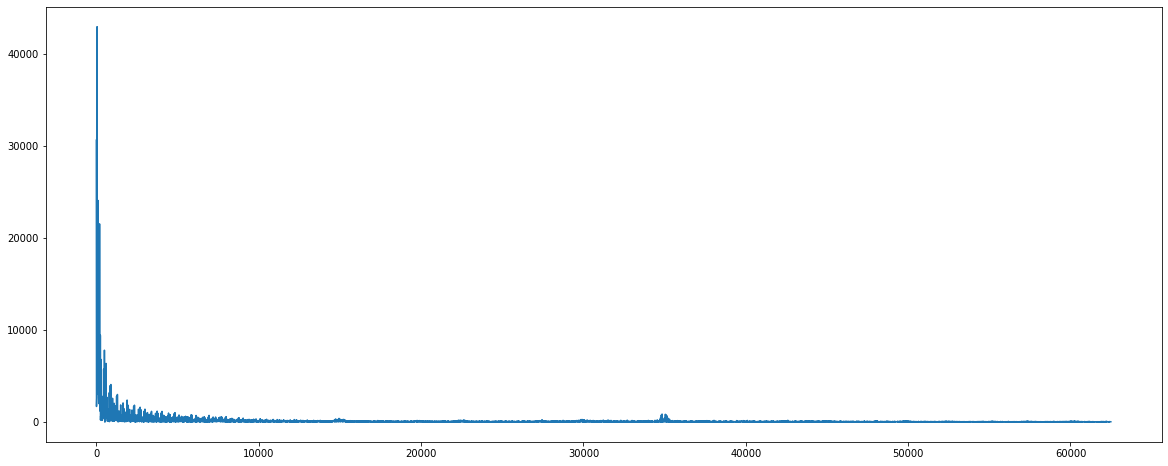

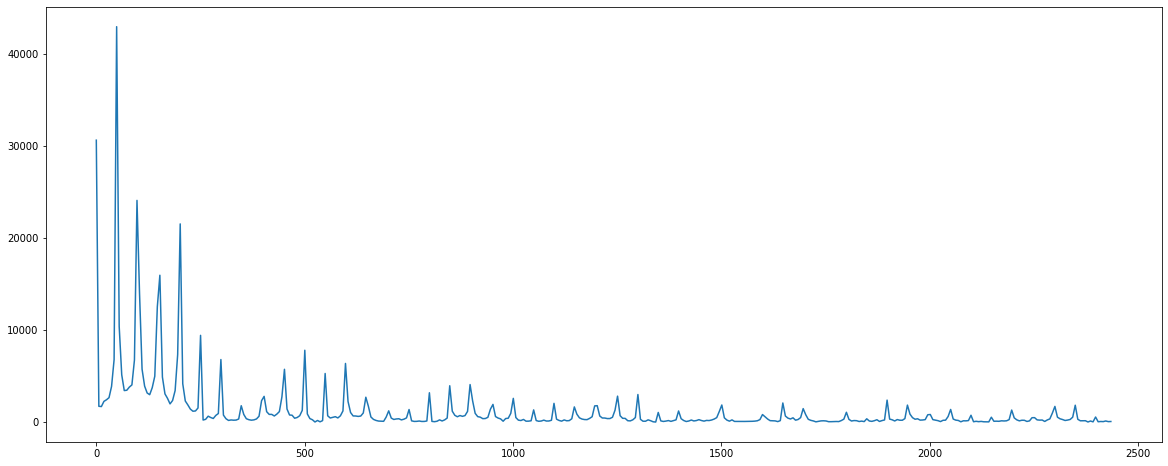

In [ ]:
# Dominio de la frecuencia
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
ecgData = ecg['Volt'].values
fftData = np.abs( fft(ecg_filtrado) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,freq_muestreo/2, fftLen )

matplotlib.rc('figure', figsize=(20, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

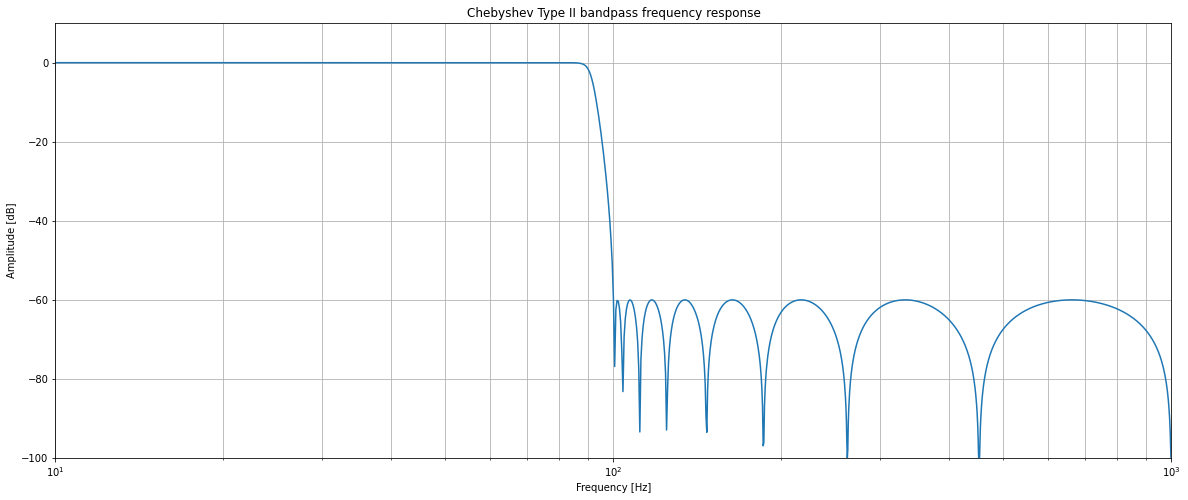

In [ ]:
## Design IIR filter
sos2 = signal.iirfilter(17, [0.5, 200], rs=60, btype='bandpass',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos2, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [ ]:
## aplico el otro filtro
ecg_filtrado2 = signal.sosfilt(sos2, ecg_filtrado)

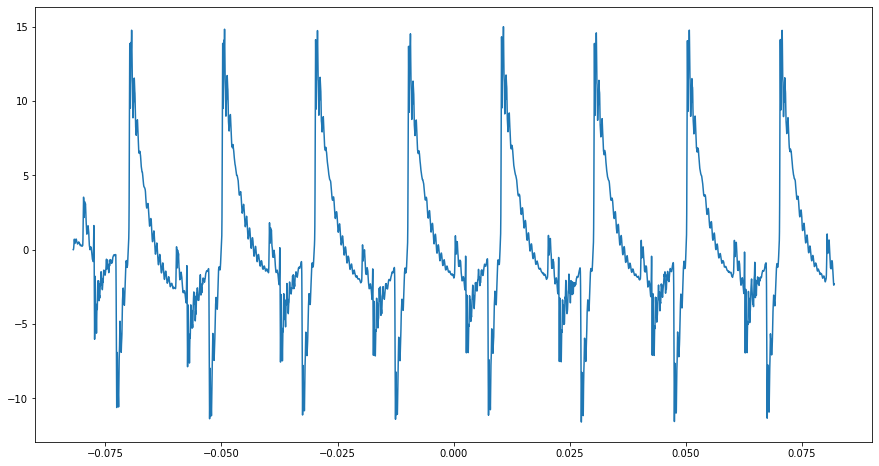

In [ ]:
# Señal en el dominio temporal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecg['Second'],ecg_filtrado2)

Text(0.5, 0, 'Tiempo (s)')

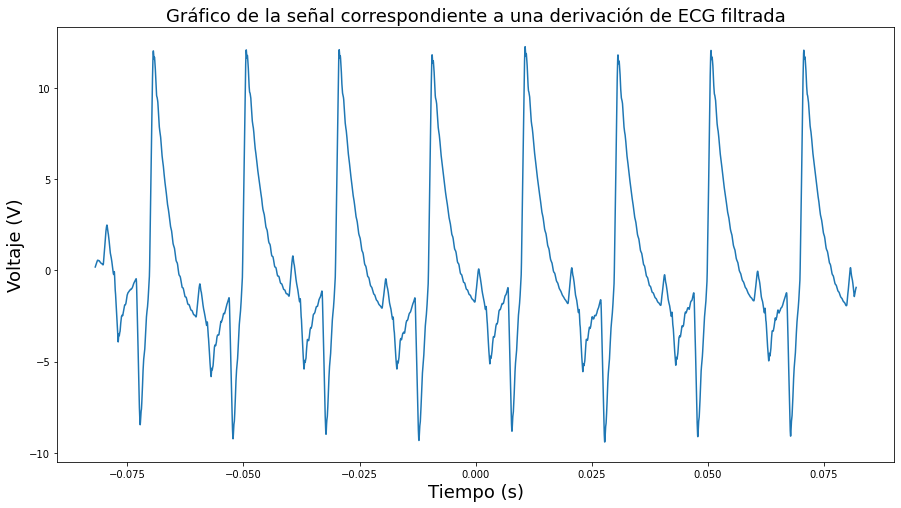

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

# Señal en el dominio temporal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecg['Second'],moving_average(ecg_filtrado2, 100))
plt.title("Gráfico de la señal correspondiente a una derivación de ECG filtrada", fontsize = 18)
plt.ylabel("Voltaje (V)", fontsize = 18)
plt.xlabel("Tiempo (s)", fontsize = 18)